# Visualizing Geometry

In [1]:
%matplotlib notebook

In [2]:
from os import listdir

import pyvista as pv
from pyvista import themes

from qlbm.infra import AmplitudeResult
from qlbm.lattice import MSLattice
from qlbm.tools.utils import create_directory_and_parents

pv.set_plot_theme(themes.ParaViewTheme())

In [3]:
lattice_2d = MSLattice(
    {
        "lattice": {
            "dim": {"x": 32, "y": 32},
            "velocities": {"x": 4, "y": 4},
        },
        "geometry": [
            {"shape": "cuboid", "x": [18, 19], "y": [7, 14], "boundary": "specular"},
            {"shape": "cuboid", "x": [18, 19], "y": [19, 26], "boundary": "specular"},
            {"shape": "cuboid", "x": [26, 27], "y": [19, 26], "boundary": "specular"},
            {"shape": "cuboid", "x": [26, 27], "y": [7, 14], "boundary": "specular"},
            {"shape": "cuboid", "x": [20, 25], "y": [4, 5], "boundary": "specular"},
            {"shape": "cuboid", "x": [20, 25], "y": [16, 17], "boundary": "specular"},
            {"shape": "cuboid", "x": [20, 25], "y": [28, 29], "boundary": "specular"},
        ],
    }
)
lattice_3d = MSLattice(
    {
        "lattice": {
            "dim": {"x": 16, "y": 128, "z": 16},
            "velocities": {"x": 4, "y": 4, "z": 4},
        },
        "geometry": [
            {
                "shape": "cuboid",
                "x": [10, 13],
                "y": [6, 88],
                "z": [10, 13],
                "boundary": "specular",
            }
        ],
    }
)

In [4]:
root_directory_2d = "qlbm-output/visualization-components-2d"
root_directory_3d = "qlbm-output/visualization-components-3d"
create_directory_and_parents(root_directory_2d)
create_directory_and_parents(root_directory_3d)

In [5]:
# Will output seven 2D stl files under `qlbm-output/visualization-components-2d/paraview`
AmplitudeResult(lattice_2d, root_directory_2d).visualize_geometry()

In [6]:
# Will output one 3D stl files under `qlbm-output/visualization-components-3d/paraview`
AmplitudeResult(lattice_3d, root_directory_3d).visualize_geometry()

2025-11-24 16:01:57.031 (   2.525s) [    7F1EF0C9CB80]vtkXOpenGLRenderWindow.:1458  WARN| bad X server connection. DISPLAY=


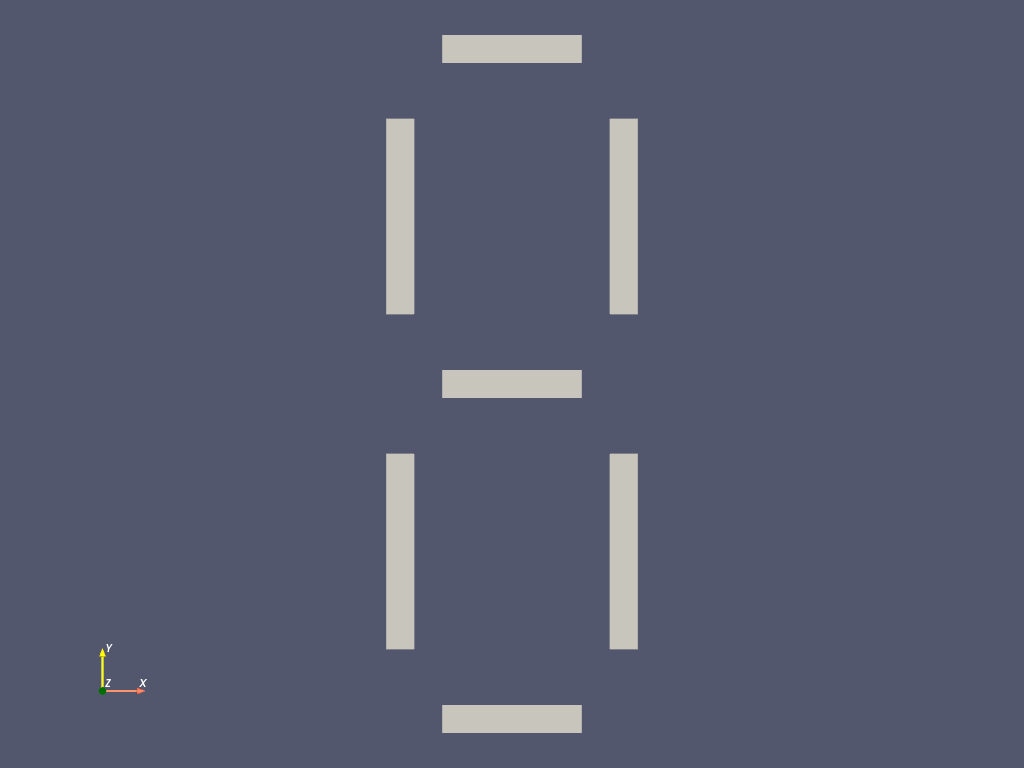

In [7]:
pv.read(
    [
        f"{root_directory_2d}/paraview/{fname}"
        for fname in listdir(f"{root_directory_2d}/paraview")
    ]
).plot(cpos="xy", show_scalar_bar=True, jupyter_backend="static")

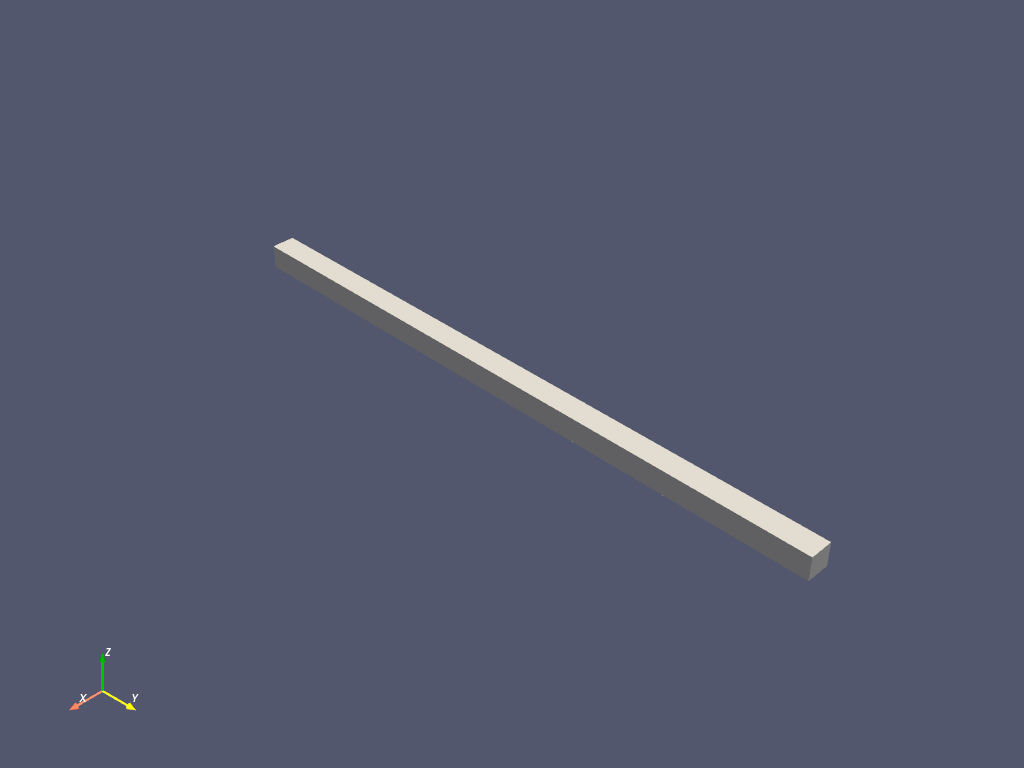

In [8]:
pv.read(
    [
        f"{root_directory_3d}/paraview/{fname}"
        for fname in listdir(f"{root_directory_3d}/paraview")
    ]
).plot(show_scalar_bar=True, jupyter_backend="static")